In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def load_data(path):
    data = pd.read_csv(path)
    return data

In [41]:
# function data_retrieve adds column 'dis_time' and 'date' into the data set for specific camera ID
# dis_time: time of each speed record
# date: date of each speed record
def data_retrieve(data, linkid):
    data = data[(data['linkId']==linkid)]
    data = data.copy(deep=True)
    data['dis_time'] = data['DataAsOf'].apply(lambda x:x.split(' ')[1])
    data['date'] = data['DataAsOf'].apply(lambda x:x.split(' ')[0])
    return data

In [32]:
# function ave_speed calculates the average speed for specific time type
# ave_speed('date') calculates the average speed for each calendar date
# ave_speed('dis_time') calculates the average speed for each time period for whole month (i.e 9:05 am)
def ave_speed(time_type):
    return data.groupby(data[time_type]).mean()['Speed']

In [49]:
# function speed_plot generates the bar graph for average speed of given time_type
def speed_plot(time_type):
    average_speed = ave_speed(time_type)
    time_list = list(np.unique(data[time_type]))
    x = list(range(len(time_list)))
    plt.bar(x,average_speed)
    plt.show()
    return time_list

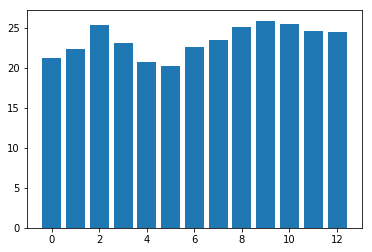

['4/18/2015', '4/19/2015', '4/20/2015', '4/21/2015', '4/22/2015', '4/23/2015', '4/24/2015', '4/25/2015', '4/26/2015', '4/27/2015', '4/28/2015', '4/29/2015', '4/30/2015']


In [50]:
# one example plot of daily average speed for camera 4616325 
raw_data = load_data('/Users/yingzhu/Desktop/2015 Raw Data/2015-04.csv')
data = data_retrieve(raw_data,4616325)
time_list = speed_plot('date')
print(time_list)